<a href="https://colab.research.google.com/github/yuri200819/-/blob/main/%E5%A4%9A%E9%A0%85%E5%BC%8F%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%80%80%E5%93%BA%E4%B9%B3%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import matplotlib.style
matplotlib.style.use("ggplot")
sleep_df = pd.read_csv("sleep_in_mammals.csv")
print(sleep_df)

                   Species    BodyWt  BrainWt  ...  Predation  Exposure  Danger
0          Africanelephant  6654.000   5712.0  ...          3         5       3
1   Africangiantpouchedrat     1.000      6.6  ...          3         1       3
2                ArcticFox     3.385     44.5  ...          1         1       1
3     Arcticgroundsquirrel     0.920      5.7  ...          5         2       3
4            Asianelephant  2547.000   4603.0  ...          3         5       4
..                     ...       ...      ...  ...        ...       ...     ...
57               Treehyrax     2.000     12.3  ...          3         1       3
58               Treeshrew     0.104      2.5  ...          3         2       2
59                  Vervet     4.190     58.0  ...          4         3       4
60            Wateropossum     3.500      3.9  ...          2         1       1
61    Yellow-belliedmarmot     4.050     17.0  ...          3         1       1

[62 rows x 11 columns]


In [ ]:
#LifeSpan(寿命)がどの説明変数に強く影響されるか
print(sleep_df[["LifeSpan","BodyWt","BrainWt","NonDreaming","Dreaming","TotalSleep"]].corr())
print(sleep_df[["LifeSpan","Gestation","Predation","Exposure","Danger"]].corr())

             LifeSpan    BodyWt   BrainWt  NonDreaming  Dreaming  TotalSleep
LifeSpan     1.000000  0.302451  0.509253    -0.384432 -0.295745   -0.410202
BodyWt       0.302451  1.000000  0.934164    -0.375946 -0.109383   -0.307186
BrainWt      0.509253  0.934164  1.000000    -0.369218 -0.105139   -0.358102
NonDreaming -0.384432 -0.375946 -0.369218     1.000000  0.514254    0.962715
Dreaming    -0.295745 -0.109383 -0.105139     0.514254  1.000000    0.727087
TotalSleep  -0.410202 -0.307186 -0.358102     0.962715  0.727087    1.000000
           LifeSpan  Gestation  Predation  Exposure    Danger
LifeSpan   1.000000   0.614849  -0.102544  0.360352  0.061778
Gestation  0.614849   1.000000   0.200504  0.638279  0.378617
Predation -0.102544   0.200504   1.000000  0.618246  0.916042
Exposure   0.360352   0.638279   0.618246  1.000000  0.787203
Danger     0.061778   0.378617   0.916042  0.787203  1.000000


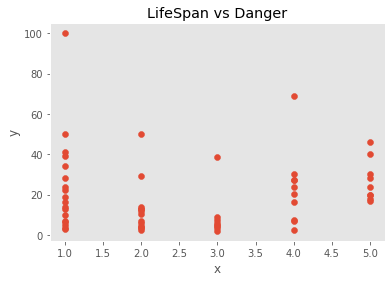

In [ ]:
#fig, ax = plt.subplots()
plt.scatter(sleep_df["Danger"] ,
            sleep_df["LifeSpan"])
plt.title("LifeSpan vs Danger")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics  import r2_score
print("r^2:", r2_score(y,  y_pred))
#データ少なすぎる

r^2: 0.9632140929367429


In [ ]:
df = pd.read_csv("sin_train.csv")
x_train = df["x"]
y_train = df["y"]
print(df)

     x         y
0 -3.0  1.930222
1 -1.8  0.813369
2 -0.6  1.256404
3  0.6  2.397626
4  1.8  2.338676
5  3.0  1.874059


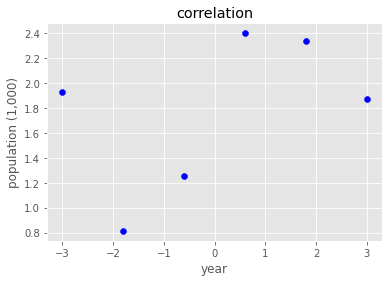

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, color = "blue")

plt.title("correlation")
plt.xlabel("year")
plt.ylabel("population (1,000)")
plt.show()

In [ ]:
s1=pd.Series(x_train)
s2=pd.Series(y_train)
res=s1.corr(s2)
print(res)

0.4673830111594571


In [ ]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train)

model_1 = Pipeline([
     ("poly", PolynomialFeatures(degree=1)),
     ("linear", LinearRegression())
])
model_1.fit(x_train, y_train)

model_3 = Pipeline([
     ("poly", PolynomialFeatures(degree=3)),
     ("linear", LinearRegression())
])
model_3.fit(x_train, y_train)

model_6 = Pipeline([
     ("poly", PolynomialFeatures(degree=6)),
     ("linear", LinearRegression())
])
model_6.fit(x_train, y_train)

model_7 = Pipeline([
     ("poly", PolynomialFeatures(degree=7)),
     ("linear", LinearRegression())
])
model_7.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=7, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

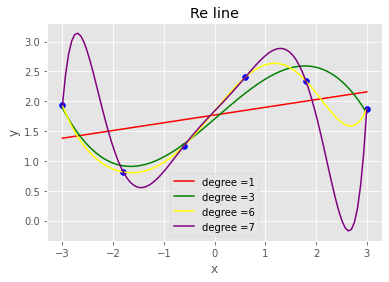

In [ ]:

fig, ax = plt.subplots()
ax.scatter(x_train, y_train, color = "blue")

_x = np.linspace(-3,3,100).reshape(-1,1)

plt.plot(_x,model_1.predict(_x), color ="red",
         label = "degree =1")
plt.plot(_x,model_3.predict(_x), color ="green",
         label = "degree =3")
plt.plot(_x,model_6.predict(_x), color ="yellow",
         label = "degree =6")
plt.plot(_x,model_7.predict(_x), color ="purple",
         label = "degree =7")
plt.legend()
plt.title("Re line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
df_test = pd.read_csv("sin_test.csv")
x_test = df_test["x"]
y_test = df_test["y"]
print(df_test)

     x         y
0 -3.0  1.364996
1 -1.8  0.324298
2 -0.6  0.182857
3  0.6  1.815520
4  1.8  2.210358
5  3.0  1.519721


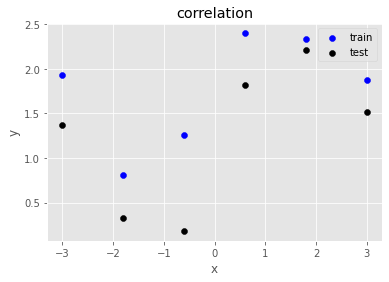

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, color = "blue",label="train")
ax.scatter(x_test, y_test, color = "black",label="test")
plt.legend()
plt.title("correlation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

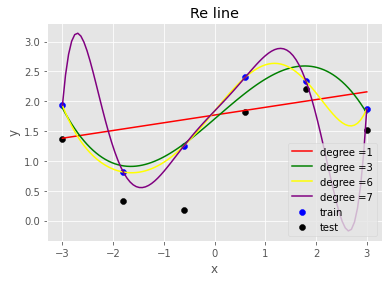

In [ ]:

fig, ax = plt.subplots()
ax.scatter(x_train, y_train, color = "blue",label="train")
ax.scatter(x_test, y_test, color = "black",label="test")
_x = np.linspace(-3,3,100).reshape(-1,1)

plt.plot(_x,model_1.predict(_x), color ="red",
         label = "degree =1")
plt.plot(_x,model_3.predict(_x), color ="green",
         label = "degree =3")
plt.plot(_x,model_6.predict(_x), color ="yellow",
         label = "degree =6")
plt.plot(_x,model_7.predict(_x), color ="purple",
         label = "degree =7")
plt.legend()
plt.title("Re line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import  mean_squared_error
print("MSE 1(train):", mean_squared_error(y_train, model_1.predict(x_train)))
print("MSE 1(test):", mean_squared_error(y_test, model_1.predict(x_test)))
print("MSE 3(train):", mean_squared_error(y_train, model_3.predict(x_train)))
print("MSE 3(test):", mean_squared_error(y_test, model_3.predict(x_test)))
print("MSE 6(train):", mean_squared_error(y_train, model_6.predict(x_train)))
print("MSE 6(test):", mean_squared_error(y_test, model_6.predict(x_test)))
print("MSE 7(train):", mean_squared_error(y_train, model_7.predict(x_train)))
print("MSE 7(test):", mean_squared_error(y_test, model_7.predict(x_test)))

MSE 1(train): 0.25175297324386636
MSE 1(test): 0.6985078996533366
MSE 3(train): 0.02552674131827229
MSE 3(test): 0.3603529832272161
MSE 6(train): 1.6191452252672227e-27
MSE 6(test): 0.3653405870307773
MSE 7(train): 4.120072596549616e-28
MSE 7(test): 0.3653405870307906


In [ ]:
from sklearn.metrics import r2_score
print("r^2 1(train): ", r2_score(y_train, model_1.predict(x_train)))
print("r^2 1(test): ", r2_score(y_test, model_1.predict(x_test)))
print("r^2 3(train): ", r2_score(y_train, model_3.predict(x_train)))
print("r^2 3(test): ", r2_score(y_test, model_3.predict(x_test)))
print("r^2 6(train): ", r2_score(y_train, model_6.predict(x_train)))
print("r^2 6(test): ", r2_score(y_test, model_6.predict(x_test)))
print("r^2 7(train): ", r2_score(y_train, model_7.predict(x_train)))
print("r^2 7(test): ", r2_score(y_test, model_7.predict(x_test)))

r^2 1(train):  0.218446879120481
r^2 1(test):  -0.2613516073664943
r^2 3(train):  0.920753649555295
r^2 3(test):  0.34928178358678463
r^2 6(train):  1.0
r^2 6(test):  0.34027526830234567
r^2 7(train):  1.0
r^2 7(test):  0.3402752683023217


In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
import pandas as pd

boston_df = pd.DataFrame(boston.data,
                         columns =
                         boston.feature_names)

boston_df["MEDV"] = boston.target
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [ ]:
print(boston_df[["RM","MEDV"]].corr())

           RM     MEDV
RM    1.00000  0.69536
MEDV  0.69536  1.00000


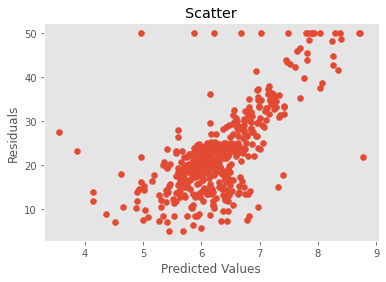

In [ ]:
plt.scatter(boston_df["RM"],
            boston_df["MEDV"])
plt.title("Scatter")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size = 0.7, test_size = 0.3, random_state = 0)

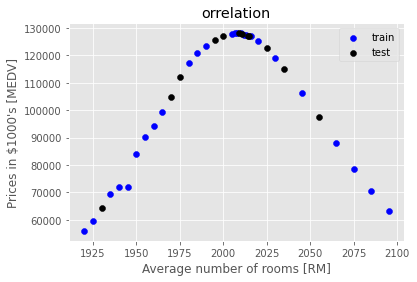

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train,color ="blue", label = "train")
ax.scatter(x_test, y_test,color ="black", label = "test")
plt.legend()
plt.title("orrelation")
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Prices in $1000\'s [MEDV]")
plt.show()